In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('D:\Imam\Belajar\Python\Data_Science\dataset_heart\dataset_heart.csv', sep=',')

In [3]:
df

,age,gender,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.40,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.60,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.30,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.20,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.20,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.50,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.00,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.30,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.40,2,0,6,1


In [4]:
df.isna().sum()

age                                     0
gender                                  0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.columns

Index(['age', 'gender', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

In [7]:
Categorial = []
Numberical = []

for col in df.columns:
    unique = df[col].unique()
    if (len(unique) < 5):
        Categorial.append(col)
    else :
        Numberical.append(col)

In [8]:
Categorial

['gender',
 'chest pain type',
 'fasting blood sugar',
 'resting electrocardiographic results',
 'exercise induced angina',
 'ST segment',
 'major vessels',
 'thal',
 'heart disease']

In [9]:
Numberical

['age',
 'resting blood pressure',
 'serum cholestoral',
 'max heart rate',
 'oldpeak']

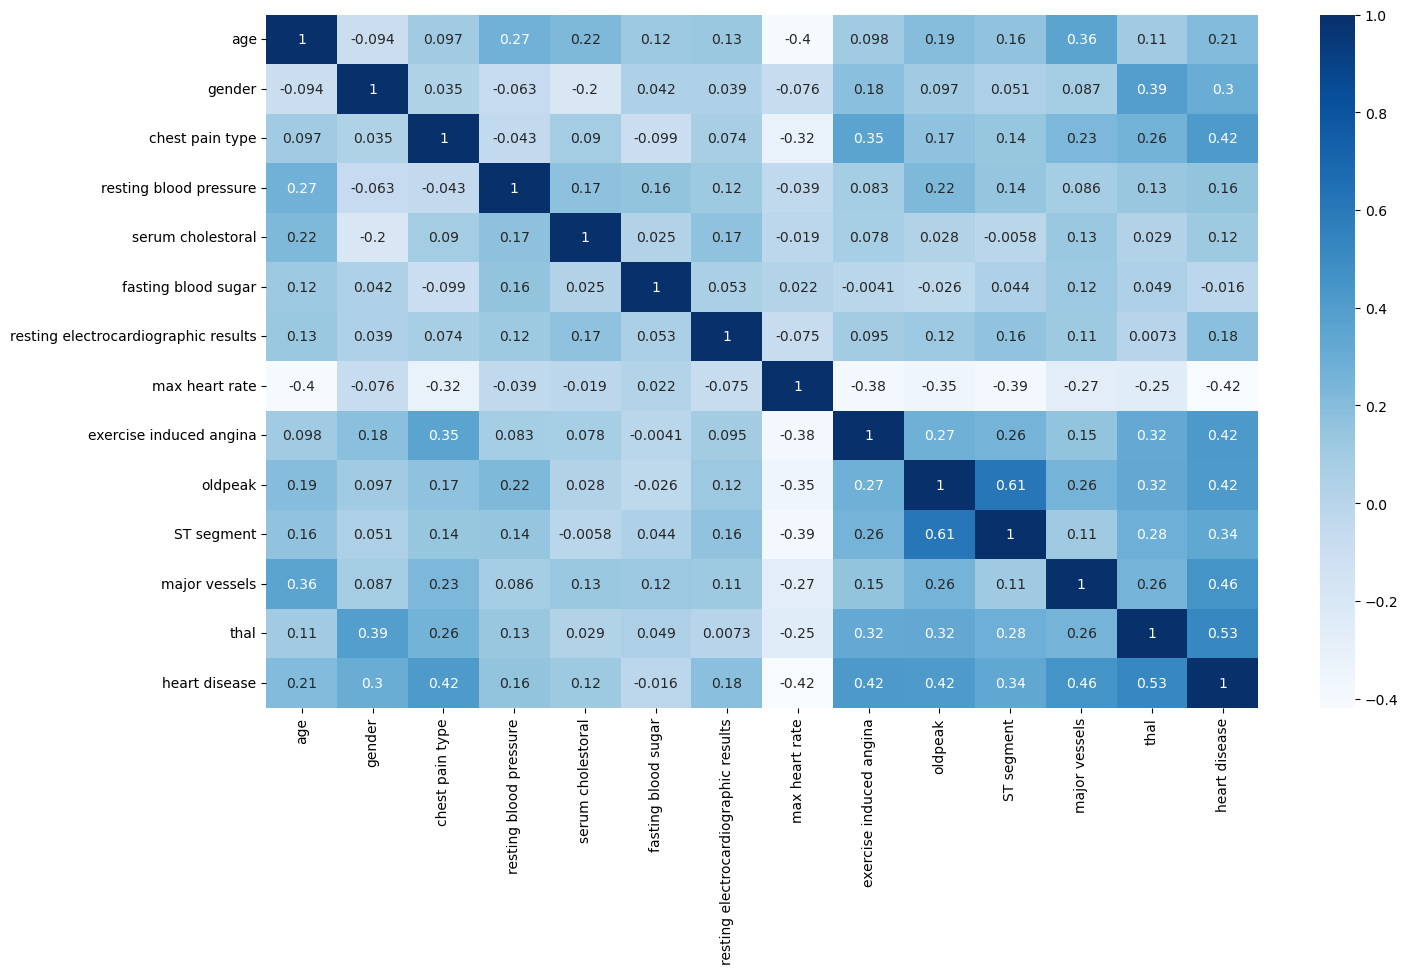

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

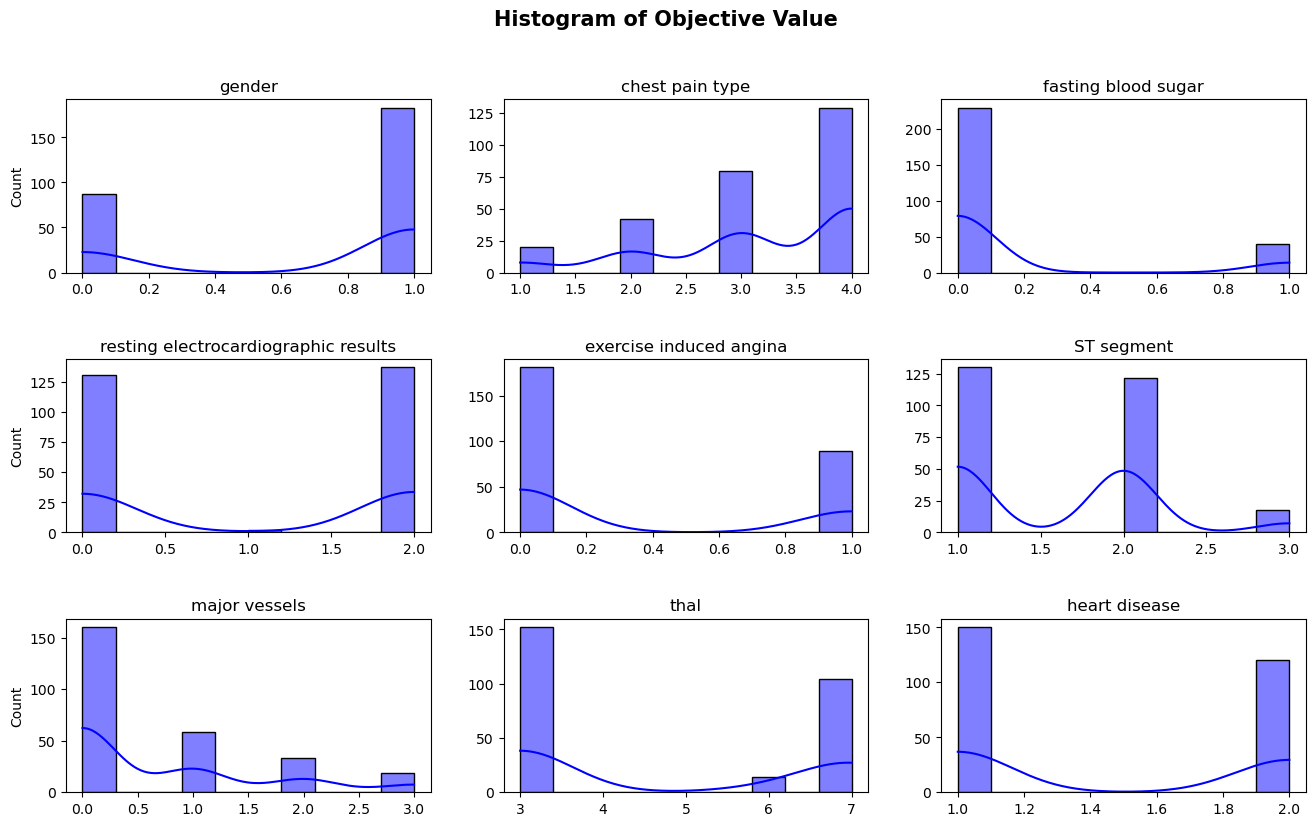

In [11]:
fig,ax = plt.subplots(ncols = 3, nrows = 3,
                     figsize = (16,9))
fig.subplots_adjust(hspace = 0.5)
ax = ax.flatten()

for i,col in enumerate(Categorial):
    
    sns.histplot(data = df,
                x = col,
                kde = True,
                color = 'blue',
                ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    
    if i % 3 != 0:
        ax[i].set_ylabel('')
        
fig.suptitle('Histogram of Objective Value', fontsize = 15, weight = 'bold')
plt.show()

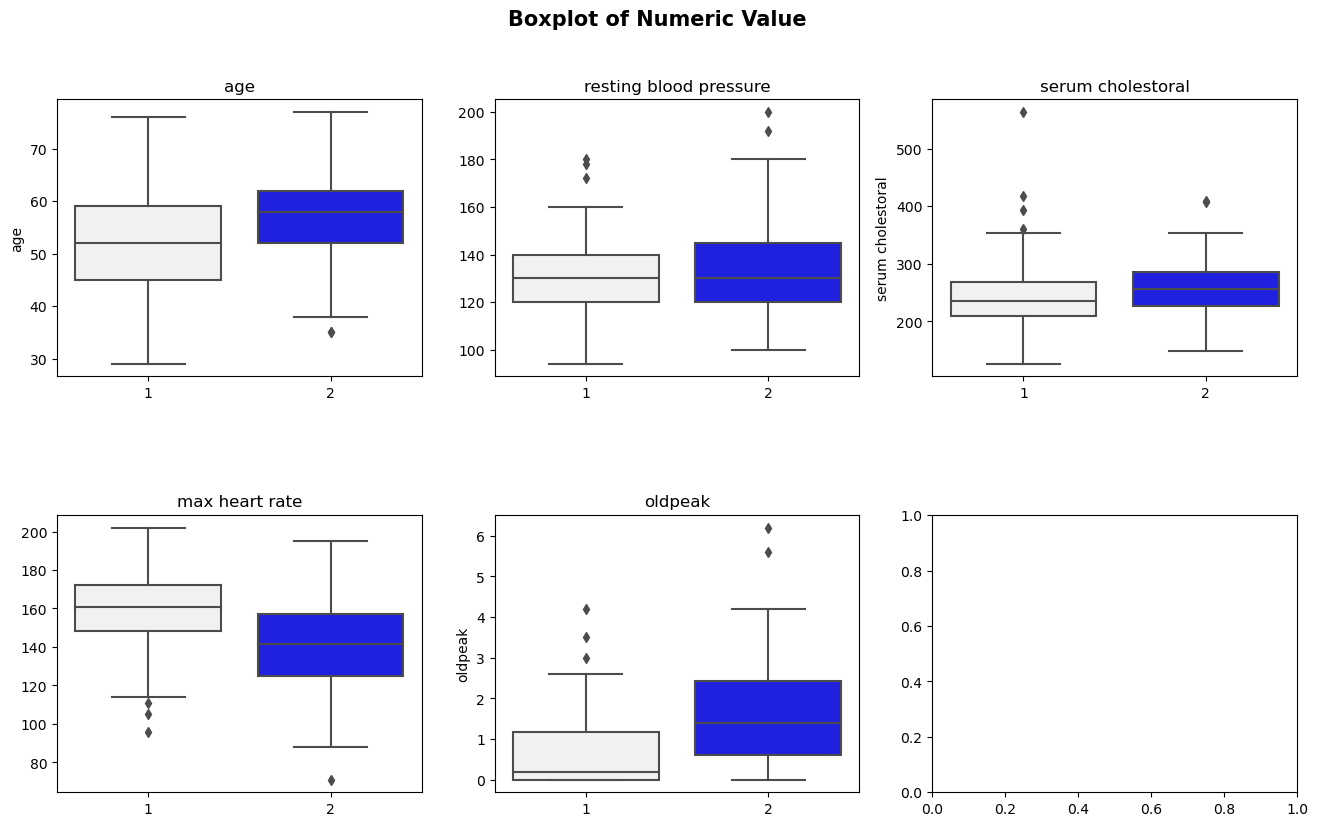

In [12]:
fig,ax = plt.subplots(ncols = 3, nrows = 2,
                     figsize = (16,9))
fig.subplots_adjust(hspace = 0.5)
ax = ax.flatten()

for i,col in enumerate(Numberical):
    
    sns.boxplot(data = df,
                x = 'heart disease',
                y = col,
                ax = ax[i],
                palette = "light:b")
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    
    if i % 2 != 0:
        ax[i].set_ylabel('')
        
fig.suptitle('Boxplot of Numeric Value', fontsize = 15, weight = 'bold')
plt.show()

In [13]:
X = df.drop(['heart disease'], axis = 1)
y = df['heart disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size=0.8)

In [14]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [15]:
LF = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
model_LF, predictions = LF.fit(X_train, X_test, y_train, y_test)
print(model_LF)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 44.78it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearDiscriminantAnalysis         0.93               0.91     0.91      0.93   
CalibratedClassifierCV             0.93               0.91     0.91      0.93   
RidgeClassifierCV                  0.93               0.91     0.91      0.93   
RidgeClassifier                    0.93               0.91     0.91      0.93   
LinearSVC                          0.91               0.90     0.90      0.91   
LogisticRegression                 0.91               0.90     0.90      0.91   
GaussianNB                         0.91               0.89     0.89      0.91   
SVC                                0.89               0.87     0.87      0.89   
NuSVC                              0.89               0.87     0.87      0.89   
QuadraticDiscriminantAnalysis      0.89               0.87     0.87      0.89   
AdaBoostClassifier          

In [16]:
LA = LinearDiscriminantAnalysis()
model_LA = LA.fit(X_train, y_train)

In [17]:
predictions_LA = model_LA.predict(X_test)

In [18]:
accuracy_score(predictions_LA, y_test)

0.9259259259259259

In [19]:
print(classification_report(predictions_LA, y_test))

              precision    recall  f1-score   support

           1       0.97      0.91      0.94        35
           2       0.86      0.95      0.90        19

    accuracy                           0.93        54
   macro avg       0.91      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54



In [20]:
def data_predict(n):
    predict = pd.DataFrame({'original' : df['heart disease'].values[:n], 'Predict' : model_LA.predict(df.iloc[:,:-1])[:n]})
    print(predict)

In [21]:
data_predict(15)

    original  Predict
0          2        2
1          1        2
2          2        1
3          1        2
4          1        1
5          1        1
6          2        2
7          2        2
8          2        2
9          2        2
10         1        2
11         1        2
12         1        1
13         2        1
14         1        1
